In [ ]:
# This script contains typical example of the post-treatment of the results of
# my numerical simulations. It includes the regrouping of the data from different files into one file,
# fitting the obtained results, calculating the root mean square error of the fit, and, finally,
#the visualization of the data.

In [1]:
import numpy as np

In [2]:
import os, subprocess

In [6]:
retval = os.getcwd()
print "Current working directory %s" % retval


Current working directory /home6/matveeva/Dens_cor/RPA_dens_matr_v3/N_13_13_rs_5_new_rew


In [3]:
if not os.path.exists('Data_F'):
    os.mkdir('Data_F')

In [ ]:
#---------------------------------------------------------------------#
# Regroupping the simulation results from different files in one file
#---------------------------------------------------------------------#

In [14]:
#list_beta = [40.0, 55.0, 70.0]
list_beta = [0.25, 0.5,1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 11.0, 14.0, 20.0, 25.0, 30.0, 40.0, 55.0, 70.0] 

name_read_1='beta_'
name_read_2='/Measur/Sk_av_1.dat' 
name_write_1='Data_F_1/F_'
name_write_2='.txt'
num_k=31
count = 0
for x in list_beta:
        name_read_3=name_read_1+str(x)+name_read_2
        f = open(name_read_3, "r")
        f2=open('Data_F_1/list_k.txt',"w")
        f3=open('Data_F_1/Sk_av.dat',"r")
        for i in range(num_k):
            l3=f3.readline()
            b3=l3.split()
            l=f.readline()
            b=l.split()
            f2.write("{0} {1}\n".format(i, b[0]))
            a=round(float(b[0]),3)
            name_write_3=name_write_1+str(a)+name_write_2
            f1=open(name_write_3, "a")
            if count == 0:
                f1.write("{0} {1} {2}\n".format(0.0, b3[1], b3[2]))
            f1.write("{0} {1} {2}\n".format(x,b[1],b[2]))
            f1.close()
            
        f.close()     
        f2.close()
        f3.close()
        count += 1

In [15]:
!ls Data_F_1

F_0.695.txt  F_2.781.txt  F_4.054.txt  F_5.061.txt  VIM_commands.txt
F_0.983.txt  F_2.866.txt  F_4.171.txt  F_5.295.txt  fit.log
F_1.39.txt   F_2.95.txt   F_4.397.txt  F_5.43.txt   ideal_13_13_rs_5.txt
F_1.555.txt  F_3.109.txt  F_4.452.txt  F_5.562.txt  ideal_correction.txt
F_1.966.txt  F_3.476.txt  F_4.664.txt  F_5.605.txt  list_k.txt
F_2.086.txt  F_3.545.txt  F_4.867.txt  F_5.733.txt  list_k_1.txt
F_2.198.txt  F_3.744.txt  F_4.916.txt  F_5.899.txt
F_2.507.txt  F_3.933.txt  F_5.013.txt  Sk_av.dat


In [20]:
!head 'Data_F_1/F_2.866.txt'

0.0 0.877999 0.00113924
0.25 0.810788 0.00394954
0.5 0.761873 0.00256537
1.0 0.681943 0.00216739
2.0 0.541069 0.00200824
3.0 0.426752 0.00323221
4.0 0.347066 0.003446
6.0 0.231546 0.00303918
8.0 0.180261 0.00523698
11.0 0.131905 0.00548687


In [22]:
!cat 'Data_F_1/list_k.txt'

0 0.695214
1 0.98318
2 1.39043
3 1.55454
4 1.96636
5 2.08564
6 2.19846
7 2.50663
8 2.78085
9 2.86644
10 2.94954
11 3.10909
12 3.47607
13 3.54491
14 3.74384
15 3.93272
16 4.05376
17 4.17128
18 4.39692
19 4.45154
20 4.66363
21 4.8665
22 4.9159
23 5.01326
24 5.06123
25 5.29459
26 5.42979
27 5.56171
28 5.60499
29 5.73288
30 5.89908


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


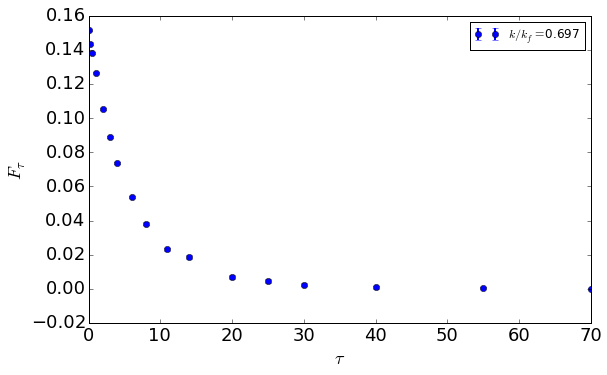

In [6]:
pylab.rcParams['figure.figsize'] = (9.0, 5.5)
num_k_min=1
num_k_max=2
f=open('Data_F_1/list_k.txt',"r")
for i in range(0, 31):
    l=f.readline()
    b=l.split()   
    a=round(float(b[1]),3)  
    #print i, a
    #name = 'Data_F_long/F_'+str(a)+'.txt'
    name1 = 'Data_F_1/F_'+str(a)+'.txt'
    #data = pylab.loadtxt(name)
    data1 = pylab.loadtxt(name1)
    #name_legend = '$k/k_f=$'+str(round(a/1.41,3))+', $n_{bl} = 1000 for \\beta=8, 11, 14, 20, 30$'
    #name_legend_1 = '$k/kf=$'+str(round(a/1.41,3))+', reweight'
    name_legend_1 = '$k/k_f=$'+str(round(a/1.41,3))
    if( i >= num_k_min and i<num_k_max):
        #pylab.plot( data[:,0], data[:,1], '+', ms = 8, linewidth=2.5, label=name_legend)
        plt.errorbar(data1[:,0], data1[:,1], yerr= data1[:,2],  fmt='o', ms = 6, linewidth=2.0, label=name_legend_1)
        #plt.errorbar(data[:,0], data[:,1], yerr= data[:,2], color='red', fmt='o', ms = 6, linewidth=2.0, label=name_legend)
        plt.hold(True)
    #print name
f.close()
plt.tick_params(labelsize=18)
plt.xlabel('$\\tau$', fontsize=18)
plt.ylabel('$F_{\\tau}$', fontsize=18)
#pylab.ylim([0,0.05])
pylab.legend(loc='upper right')

In [ ]:
#-------------------------------------------------------------------------#
# Statistical part
#-------------------------------------------------------------------------#

In [7]:
from scipy.optimize import curve_fit

In [ ]:
# Defining the functions to fit the simulation results and to calculate the root mean square error of the fits

In [8]:
def fun_csi(x, *par):
    s=0    
    for i in range(0,len(x)):
        #print "{0} {1} {2} {3}".format(x[i,0], x[i,1], func(x[:,0], *par)[i], x[i,2])
        temp = (x[i,1]-func(x[:,0], *par)[i]) / x[i,2]
        s=s + temp*temp
    ndf = len(data)-len(par)
    #print s/ndf #hopefully gives us csi^2 parameter   
    return s/ndf 

def fun_csi_1(x, *par):
    s=0    
    for i in range(0,len(x)):
        #print "{0} {1} {2} {3}".format(x[i,0], x[i,1], func(x[:,0], *par)[i], x[i,2])
        temp = (x[i,1]-func1(x[:,0], *par)[i]) / x[i,2]
        s=s + temp*temp
    ndf = len(data)-len(par)
    #print s/ndf #hopefully gives us csi^2 parameter   
    return s/ndf 

def func(x, a, b, c, d):
    return a * np.exp(-b * x) + c * np.exp(-d * x)
def func1(x, a, b):
    return a * np.exp(-b * x)

In [51]:
os.remove('Data_F_long/csi_0.txt')

In [38]:
!ls 'Data_F'

F_0.695.txt  F_2.781.txt  F_4.054.txt  F_5.061.txt  VIM_commands.txt
F_0.983.txt  F_2.866.txt  F_4.171.txt  F_5.295.txt  csi_0.txt
F_1.39.txt   F_2.95.txt   F_4.397.txt  F_5.43.txt   csi_0_1.txt
F_1.555.txt  F_3.109.txt  F_4.452.txt  F_5.562.txt  fit.log
F_1.966.txt  F_3.476.txt  F_4.664.txt  F_5.605.txt  ideal_13_13_rs_5.txt
F_2.086.txt  F_3.545.txt  F_4.867.txt  F_5.733.txt  ideal_correction.txt
F_2.198.txt  F_3.744.txt  F_4.916.txt  F_5.899.txt  list_k.txt
F_2.507.txt  F_3.933.txt  F_5.013.txt  Sk_av.dat    list_k_1.txt


In [ ]:
# Fitting and plotting the data, obtaining another physical characteristic from the coefficients of the fit

In [20]:
pylab.rcParams['figure.figsize'] = (10.0, 6.5)

num_k_min=0
num_k_max=31
f=open('Data_F_1/list_k.txt',"r")
g = open('Data_F_1/csi_0.txt', 'a')
for i in range(0, 31):
    l=f.readline()
    b_str=l.split()   
    a_str=round(float(b_str[1]),3) 
    #print float(b_str[1]) 
    #print i, a
    name = 'Data_F_1/F_'+str(a_str)+'.txt'
    name2 = 'Data_F_1/F_'+str(a_str)+'.txt'
    #name3 = 'Data_F_rew_1/F_'+str(a_str)+'.txt'
    data = pylab.loadtxt(name)
    data2 = pylab.loadtxt(name2)
    #data3 = pylab.loadtxt(name3)
    name_legend2 = 'k/k_F=' +str(round(a_str/np.sqrt(2),3))
    #name_legend3 = '$k/k_f= 1.77, reweighted$'
    if( i >= num_k_min and i<num_k_max):
        #pylab.plot( data[:,0], data[:,1], marker='o', ms = 8, linewidth=2.5, label=name_legend)
        #plt.hold(True)
    #print name
        print "------------------------------------------------------------"
        print "{0} {1} k/k_F = {2}".format(i, name_legend2, a_str/np.sqrt(2))
        
        if(num_k_max - num_k_min <3):
            #pylab.plot( data[:,0], data[:,1],'o', label = name_legend)
            #plt.errorbar(data[:,0], data[:,1], yerr= data[:,2], fmt='o', ms = 7, linewidth=2.0,label=name_legend)
            plt.errorbar(data2[:,0], data2[:,1], yerr= data2[:,2], color= 'red', fmt='s', ms = 7, linewidth=2.0,label=name_legend2)
            #plt.errorbar(data3[:,0], data3[:,1], yerr= data3[:,2], fmt='o', ms = 7, linewidth=2.0,label=name_legend3)
            plt.tick_params(labelsize=18)
            plt.xlabel('$\\beta$', fontsize=22)
            plt.ylabel('$F(\\beta)$', fontsize=22)
            plt.hold(True)

        if (i == num_k_min):
            init=[data[0,1]*0.9,0.1,data[0,1]*0.1,0.1]
            init1=[data[0,1]*0.9,0.1]
            print '**** initial parameters ****'
            print init[0], init[1], init[2], init[3]
            print init1[0], init1[1]
        else:
            init = [a,b,c,d]
            init1 = [a1, b1]
            print '**** initial parameters ****'
            print a, b, c, d
            print a1, b1
        
        print '***  ***  ***  ***  ***  ***'
        popt, pcov = curve_fit(func, data[:,0], data[:,1], init, data[:,2])
        popt1, pcov1 = curve_fit(func1, data[:,0], data[:,1], init1, data[:,2])

        csi = fun_csi(data, *popt)
        csi_1 = fun_csi_1(data, *popt1)
        datax = np.linspace(0, 70, 100)

        if(num_k_max - num_k_min <3):
            pylab.plot(datax,func(datax,*popt), '-', label = '$f(\\beta)=a_1exp(-b_1\\beta)+c_1exp(-d_1\\beta)$', color= 'black')
            #pylab.plot(datax,func1(datax,*popt1),'-', label = '$f_1(\\beta)=a_1exp(-b_1\\beta)$')
    
        
        print  "a={0} b={1} c={2} d={3}".format(*popt)
        a = popt[0]
        b = popt[1]
        c = popt[2]
        d = popt[3]
        err_a = np.sqrt(pcov[0,0])
        err_b = np.sqrt(pcov[1,1])
        err_c = np.sqrt(pcov[2,2])
        err_d = np.sqrt(pcov[3,3])
        print err_a, err_b, err_c, err_d

        print  "a1={0} b1={1}".format(*popt1)
        a1 = popt1[0]
        b1 = popt1[1]
        err_a1 = np.sqrt(pcov1[0,0])
        err_b1 = np.sqrt(pcov1[1,1])
        print err_a1, err_b1

        print "csi={0} csi_1={1}".format(csi, csi_1)

        if(csi < csi_1):
            I = (a/b+c/d)/pi
            err_I = (1/pi)*np.sqrt((err_a/b)*(err_a/b) + a*a*err_b*err_b/(b*b*b*b) + (err_c/d)*(err_c/d) + c*c*err_d*err_d/(d*d*d*d))
            print "I = {0} error= {1}".format(I, err_I)
        else:
            I = (a1/b1)/pi
            err_I = (1/pi)*np.sqrt((err_a1/b1)*(err_a1/b1) + a1*a1*err_b1*err_b1/(b1*b1*b1*b1))
            print "I_1 = {0} error_1= {1}".format(I, err_I)
       
        g.write("{0} {1} {2}\n".format(float(b_str[1])/np.sqrt(2), I, err_I))
f.close()
g.close()
if(num_k_max - num_k_min <3):
    pylab.legend(loc='upper right')
#pylab.ylim([0,0.2])

------------------------------------------------------------
0 k/k_F=0.491 k/k_F = 0.491439212925
**** initial parameters ****
0.08975115 0.1 0.00997235 0.1
0.08975115 0.1
***  ***  ***  ***  ***  ***
a=0.0188619331086 b=0.030273418649 c=0.0810476646183 d=0.186255116507
0.00144240068807 0.00185165824689 0.00140280628938 0.00383270884296
a1=0.0985785950985 b1=0.138852231778
0.00148170494835 0.00671798688113
csi=0.916233350466 csi_1=55.4647998424
I = 0.336834223614 error= 0.0197744434191
------------------------------------------------------------
1 k/k_F=0.695 k/k_F = 0.695085965906
**** initial parameters ****
0.0188619331086 0.030273418649 0.0810476646183 0.186255116507
0.0985785950985 0.138852231778
***  ***  ***  ***  ***  ***
a=0.0266820176317 b=0.0794864690904 c=0.124775214606 d=0.204036718649
0.0146458867176 0.0211347054678 0.0145914272008 0.0122008469597
a1=0.151062156717 b1=0.174938186491
0.000455786187807 0.0019087003971
csi=1.13319631607 csi_1=3.91889554688
I = 0.30150730456 

In [ ]:
# Plotting the physical characteristic which was obtained from the coefficients of the fit above

In [21]:
pylab.rcParams['figure.figsize'] = (10.0, 6.5)

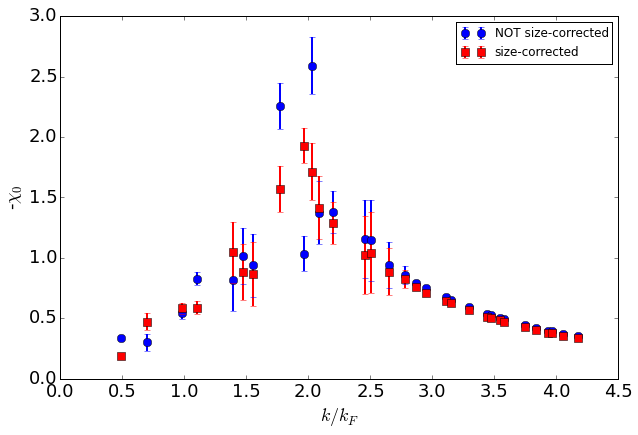

In [22]:
data = pylab.loadtxt('Data_F_1/csi_0.txt')
data_ideal = pylab.loadtxt('Data_F_1/ideal_correction.txt')
plt.errorbar(data[:,0], data[:,1], yerr= data[:,2], fmt='o', ms = 8, linewidth=2.0, label='NOT size-corrected')
plt.errorbar(data[:,0], data[:,1]*data_ideal[:,3]/data_ideal[:,2], yerr= data[:,2], color='red', fmt="s", ms = 8, linewidth=2.0, 
             label='size-corrected')
plt.tick_params(labelsize=18)
plt.xlabel('$k/k_F$', fontsize=18)
plt.ylabel('-$\chi_0$', fontsize=18)
pylab.legend(loc='upper right')
#pylab.plot( data[:,0], data[:,1],'o')
#pylab.ylim([0,4.5])
#pylab.title('$ n_{bl} = 1000 for \\beta=8, 11, 14, 20, 30;$ without rew.', fontsize=20)
#plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)

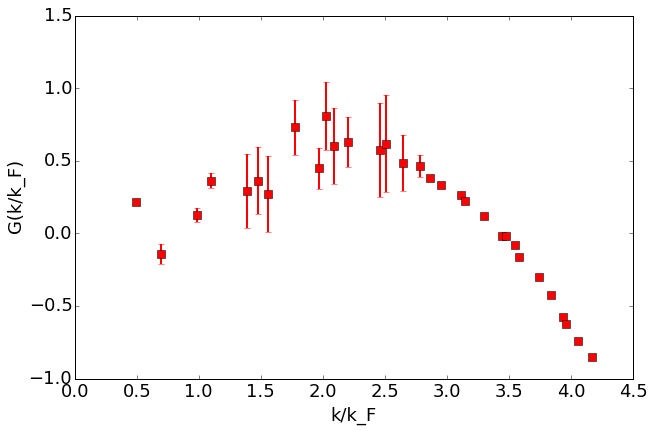

In [25]:
qF=np.sqrt(2)
rs=5
CC=rs*qF/(4*pi)
data = pylab.loadtxt('Data_F_1/csi_0.txt')
data_ideal = pylab.loadtxt('Data_F_1/ideal_correction.txt')
plt.errorbar(data[:,0], 1+CC*(1-data_ideal[:,2]/data[:,1])*data[:,0]/data_ideal[:,2], yerr= data[:,2], color='red',
fmt="s", ms = 8, linewidth=2.0)
plt.tick_params(labelsize=18)
plt.xlabel('k/k_F', fontsize=18)
plt.ylabel('G(k/k_F)', fontsize=18)

